## **pyTopoComplexity**
### **Example for using `FracD` from `pyfracd.py` to perform fractal dimension analysis** 

**Fractal dimension** analysis provides a powerful method for characterizing the roughness and complexity of land surfaces using Digital Elevation Model (DEM) data. This approach, as implemented in `FracD`, offers a quantitative measure of terrain texture at various scales. It calculates the fractal dimension, which measures the fractal characteristics of natural features (Malamud and Turcotte, 2001). This method provides insights into the self-similarity of landscapes, helping quantify their irregularity and fragmentation, which is crucial for studying the surface processes that shape Earth and planetary surfaces (Xu et al., 1993). 

The development of this module was greatly influenced by the Fortran code shared by Dr. Eulogio Pardo-Igúzquiza from his work in Pardo-Igúzquiza and Dowd (2022).

The example GeoTIFF rasters include lidar Digital Elevation Model (DEM) files that cover the area affected by a deep-seated landslide that occurred in 2014 in the Oso area of the North Fork Stillaguamish River valley, Washington State, USA (Washington Geological Survey, 2023). These example DEMs vary in grid spacing (i.e., grid size), coordinate reference system (CRS), and unit of grid value (elevation, Z).

Archives of codes and example DEM data:
* Zenodo: https://doi.org/10.5281/zenodo.11239338
* Github repository: https://github.com/GeoLarryLai/pyTopoComplexity
<hr>

### **Theory**

`FracD` adapts the variogram method to estimate the local fractal dimension within a moving window centered at each cell of the DEM raster (Taud and Parrot, 2005; Pardo-Igúzquiza and Dowd, 2022). This approach simplifies the problem to estimating the fractal dimension of one-dimensional topographic profiles within the two-dimensional moving window. For a one-dimensional profile of length $L$, the variogram $\gamma_1(k)$ can be estimated at the $K$ lag distances ($K$ lag distances ($k = 1, \ldots, K$) by:

$$
\gamma_1(k) = \frac{1}{2(L-k)} \sum_{l=1}^{L-k} [Z(i) - Z(i+l)]^2
$$

, where $Z(i)$ is the elevation at location $i$ along the profile. The local fractal dimension ($\text{FD}$) is estimated from one-dimensional 
profiles in principal directions (i.e., horizontal, vertical, and diagonal) within a square moving window. Assuming that fractional 
Brownian motion is an appropriate stochastic model for natural surfaces, its variogram follows a power-law model with respect to $k$:

$$
\gamma_1(k) = \alpha h^\beta, \quad \alpha \geq 0; \quad 0 \leq \beta < 2
$$

, and its exponent $\beta$ is related to the local fractal dimension ($\text{FD}$) by:

$$
\text{FD} = \text{TD} + 1 - \frac{\beta}{2}
$$

, where $\text{TD}$ is the topological dimension in the Euclidean space of the fractional Brownian motion. For one-dimensional fractional Brownian 
motion, $\text{TD} = 1$; thus, the fractal dimension of the two-dimensional surface $(\text{FD})_2^*$ can be estimated as the average fractal dimension of 
the one-dimensional profiles $(\text{FD})_1^*$:

$$
(\text{FD})_2^* = 1 + (\text{FD})_1^*
$$

In addition to calculating the fractal dimension, the `pyfracd` module also computes reliability parameters such as standard error and 
the coefficient of determination ($R^2$) to assess the robustness of the analysis.

<hr>

### **References**
##### Journal Articles: 
* Malamud, B.D., Turcotte, D.L., 2001. Wavelet analyses of Mars polar topography. Journal of Geophysical Research: Planets 106, 17497-17504. https://doi.org/10.1029/2000JE001333.
* Pardo-Igúzquiza, E., Dowd, P.A., 2022. The roughness of martian topography: A metre-scale fractal analysis of six selected areas. Icarus 384, 115109. https://doi.org/10.1016/j.icarus.2022.115109.
* Taud, H., Parrot, J.-F., 2005. Measurement of DEM roughness using the local fractal dimension. Géomorphologie: relief, processus, environnement 11, 327-338.
* Xu, T., Moore, I.D., Gallant, J.C., 1993. Fractals, fractal dimensions and landscapes — a review. Geomorphology 8, 245-262. https://doi.org/10.1016/0169-555X(93)90022-T.

##### Digital Elevation Model (DEM) Examples:
* Washington Geological Survey, 2023. 'Stillaguamish 2014' project [lidar data]: originally contracted by Washington State Department of Transportation (WSDOT). [accessed April 4, 2024, at http://lidarportal.dnr.wa.gov]
<hr>

#### 0. Import packages
Import the `FracD` class from the `pyfracd.py` module.

In [1]:
import os
from pytopocomplexity import FracD

In [2]:
help(FracD)

Help on class FracD in module pytopocomplexity.pyfracd:

class FracD(builtins.object)
 |  FracD(window_size=10)
 |
 |  A class for calculating local fractal dimensions to assess topographic complexity.
 |
 |  This class implements a methodology for fractal dimension analysis of Digital Elevation
 |  Model (DEM) data. It calculates local fractal dimensions and provides reliability
 |  parameters such as the standard error and coefficient of determination (R²).
 |
 |  The local fractal dimension is determined by intersecting the surface within a moving
 |  window with four vertical planes in principal geographical directions. The fractal
 |  dimension of these profiles is estimated using the variogram method, which models the
 |  relationship between dissimilarity and distance using a power-law function.
 |
 |  Required parameters:
 |  -----------
 |  window_size : int
 |      The size of the moving window for fractal dimension calculation.
 |  input_dir : str
 |      Path and filename o

#### 1. Instantiate `FracD` component
**Parameters:**
* `window_size`: Number of lags (i.e., size of the moving window) for calculating the fractal dimension. **User must specify a desired value for the window size** to define the spatial scale of geomorphic complexity in the analysis. A larger window may capture broader-scale features but require more computation time. window_size must be >= 3 (3 x 3 grids window size). Default is set to 10.

In [3]:
# Instantiate pyfracd component
fa = FracD(
    window_size=17
    )

#### 2. Run fractal dimension analysis
The `analyze` function will compute the fractal dimension result for the given window size.

**Parameters:**
* `input_dir`: file directory to the input DEM raster.
* `variograms` *[optional]*: whether to show the log-log regression diagram used for estimating β and the fractal dimension (FD)₁ along one-dimensional profiles. Default is False.
* `chunk_processing` *[optional]*: whether to use chunk-processing optimization, either True (default) or False, to mitigate RAM issues when handling large raster files.
* `chunksize` *[optional]*: size of each chunk for chunk-processing, default is (512,512). When chunk-processing is on, user can specify the desired chunk size to optimize performance on their local machine.

**Outputs:**
* `Z`: the array of input elevation data
* `FD_result`: the result array of fractal dimension calculation
* `SE_result`: the result array of standard error calculation
* `R2_result`: the result array of R² calculation
* `window_m`: the converted window size in meters

Analyzing rows:   0%|          | 0/2050 [00:00<?, ?it/s]

FD2 MIN : 2.0
FD2 MAX : 3.0
SE MIN : 0.0004135138005949557
SE MAX : 0.1360670030117035
R2 MIN : 0.0002040372637566179
R2 MAX : 0.9999973773956299


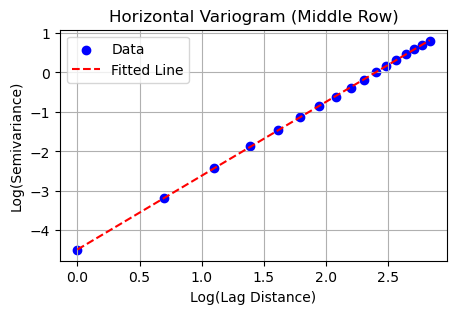

Estimated Fractal Dimension: 2.064460226744063


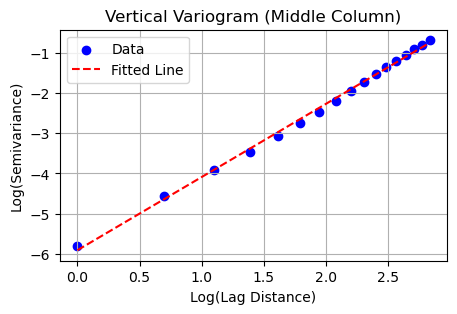

Estimated Fractal Dimension: 2.0889972300329207


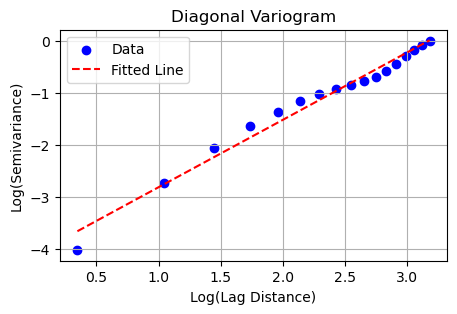

Estimated Fractal Dimension: 2.351212894243152


In [4]:
# Define input file name and directory
base_dir = os.path.join(os.getcwd(), 'ExampleDEM') # input file base directory
input_file = 'Ososlid2014_f_3ftgrid.tif'           # input file name
input_dir = os.path.join(base_dir, input_file)     # input file directory

# Run the analysis using pyfrad module (with variogram plotting function on)
_, _, _, _, window_m = fa.analyze(
    input_dir, 
    variograms=True, 
    chunk_processing=True, 
    chunksize=(512, 512)
    )
# The function can return 'Z', 'FD_result', 'SE_result', 'R2_result', and 'window_m'

#### 3. Export results
The `export_results` function will save the output as a new GeoTIFF rasters in the same folder as your input raster.

Products of Fractal Dimension Analysis include:

1. **Local Fractal Dimension (FD) Map**: Displays the spatial distribution of fractal dimension values (ranging from 2 to 3) across the terrain, with higher values indicating greater surface roughness. It also shows the size of the moving window, which is based on the grid spacing (i.e., grid size) of the raster and the variable `window_size`.

2. **Standard Error (SE) Map**: Shows the uncertainty associated with each local FD estimate, with lower values indicating more reliable estimates.

3. **Coefficient of Determination (R²) Map**: Indicates how well the power-law model fits the experimental variogram data at each location, with higher values suggesting better fit and more reliable estimates.

The edge grids, with a width at a half of the `window_size`, of the product rasters are removed to avoid edge effect. 


In [5]:
# Define output file name and file directory
output_fd_file = os.path.splitext(input_file)[0] + f'_pyFD({round(window_m, 2)}m).tif'
output_fdse_file = os.path.splitext(input_file)[0] + f'_pyFDse({round(window_m, 2)}m).tif'
output_fdr2_file = os.path.splitext(input_file)[0] + f'_pyFDr2({round(window_m, 2)}m).tif'
output_fd_dir = os.path.join(base_dir, output_fd_file)
output_fdse_dir = os.path.join(base_dir, output_fdse_file)
output_fdr2_dir = os.path.join(base_dir, output_fdr2_file)

# Export result geotiff
fa.export_results(
    output_fd_dir, 
    output_fdse_dir, 
    output_fdr2_dir
    )

'Ososlid2014_f_3ftgrid_pyFD(15.54m).tif' is saved
'Ososlid2014_f_3ftgrid_pyFDse(15.54m).tif' is saved
'Ososlid2014_f_3ftgrid_pyFDr2(15.54m).tif' is saved


#### 4. Display results
The `plot_result` function can plot the hillshade map of the original DEM and the fractal dimension analysis results.

**Parameters:**
* `output_dir` *[optional]*: Specify the directory to save the output figure. If it is not specified, the figure will be saved into the same file's directory as your input raster.
* `savefig` *[optional]*: When `savefig = True`, the `plot_result` function will save the output figure in the same folder as your input raster file.
* `figshow` *[optional]*: When `figshow = True`, the `plot_result` function will display the output figure on the screen.
* `showhillshade` *[optional]*: When `showhillshade = True`, the `plot_result` function will display the hillshade plot alongside the fractal dimension data.
* `showser2` *[optional]*: When `showser2 = True`, the `plot_result` function will display the standard error and R² plots. Please note that when `showser2 = True`, `showhillshade` must also be `True` to plot the figure properly.
* `fdcolormax` *[optional]*: Maximum value for fractal dimension color scale. If not specified, the code will always set the color scale from 2 (2D) to 3 (3D).
* `secolormax` *[optional]*: Maximum value for standard error color scale. If not specified, the code will automatically find the most suitable value for the standard error raster file.
* `r2colormax` *[optional]*: Maximum value for Coefficient of Determination (R²) color scale. If not specified, the code will always set the color scale from 0 to 1.


Figure saved as 'Ososlid2014_f_3ftgrid_pyFD(15.54m).png'


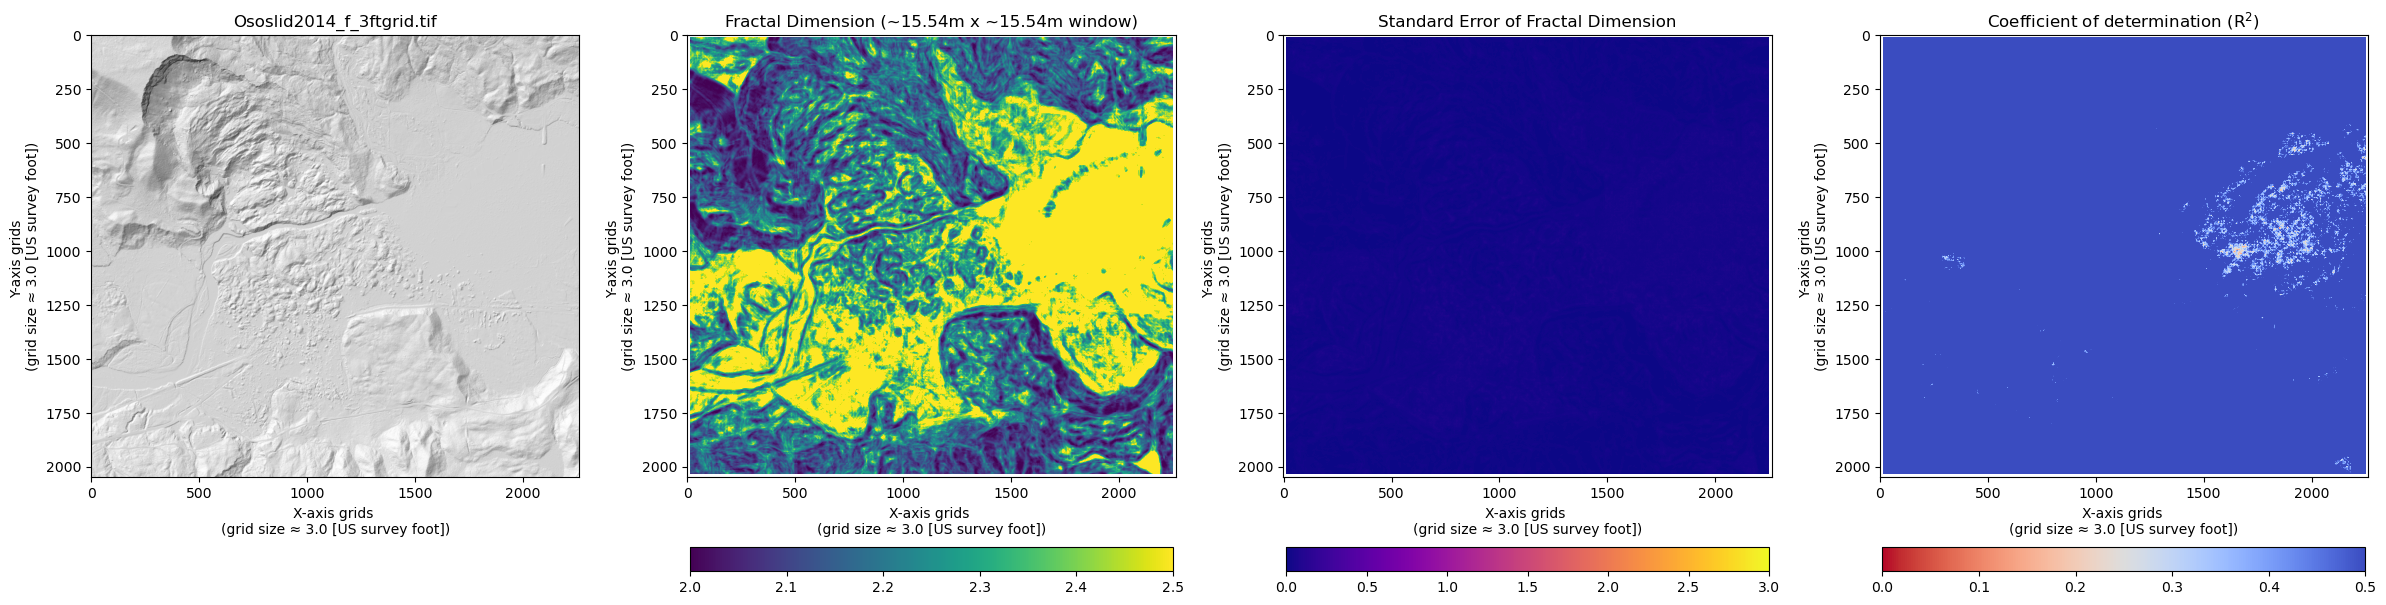

In [7]:
# Plot and save the result figures
fa.plot_result(
    output_dir=None,
    savefig=True,
    figshow=True,
    showhillshade=True,
    showse=True,
    showr2=True, 
    fdcolormax=None, 
    secolormax=None, 
    r2colormax=None
    )